In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
import sys

In [2]:
# set basic parameters for drawing and these can be changed manually
iterations = 74
processors = 4
# assign local domain based on number of processors
# processors = procs_rows * procs_cols
# the values of procs_rows and procs_cols can be read from terminal when you run main.cpp
procs_rows = 2
procs_cols = 2

In [3]:
# loop over all files that we need to draw images
# and read data from txt files and store it in all_data
all_data = []
# cnt = 0;
for n in range(iterations + 1): # 0 iteration is the beginning status and not included in number of iterations
    for id in range(processors):
        # using np.loadtxt to read files
        fname = "./output/_id_" + str(id) + "_" + str(n) + ".txt"
        data = np.genfromtxt(fname, dtype = float)
        all_data.append(data)
        # check
        # print(all_data[cnt])
        # cnt+=1

# now, all_data list should contain (iteration * processors) data matrix
# let's devide all_data list according to procs_rows, procs_cols and iterations
# and use np.concatenate to join arrays from all processors for each iteration

# in this project, we use row-major order therefore we need to concatenate each row
# row_data list is to store matrix from temp_row
row_data = []
# cnt = 0;
for n in range(iterations + 1): # 0 iteration is the beginning status
    for i in range(procs_rows):
        # find the first data for each row (i * procs_cols + j, where j = 0)
        temp_row = all_data[i * procs_cols + n * processors]
        # loop over column from second data
        # and concatenate with previous data
        for j in range(1, procs_cols):
            # axis = 1 means data is concatenated horizontally
            temp_row = np.concatenate((temp_row, all_data[i * procs_cols + j + n * processors]), axis = 1)
        # once loop over each row, append data into row_data list
        row_data.append(temp_row)
        # check
        # print(row_data[cnt])
        # cnt+=1
        
# now we have (iterations * procs_rows) rows, and now concatenate rows according to value of procs_rows
# data_each_iter list store matrix from temp_all
data_each_iter = []
# cnt = 0;
for n in range(iterations + 1): # 0 iteration is the beginning status
    # starting from the first row and loop over from the second row
    temp_all = row_data[0 + n * procs_rows]
    for i in range(1, procs_rows):
        # axis = 1 means data is concatenated vertically
        temp_all = np.concatenate((temp_all, row_data[i + n * procs_rows]), axis = 0)
    data_each_iter.append(temp_all)
    # check
    # print(data_each_iter[cnt])
    # cnt+=1

In [4]:
# now we get arrays from all processors to draw each iteration
# check each graph manually
# plt.imshow(data_each_iter[30])
# plt.colorbar()

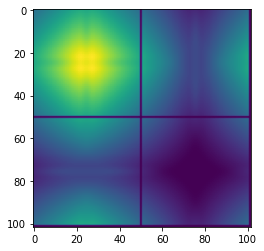

In [5]:
# create a png_list to store all png file names
png_list = []
for n in range(iterations + 1): # 0 iteration is the beginning status
    plt.imshow(data_each_iter[n])
    name = "./output/iterations_" + str(n) + ".png"
    plt.savefig(name)
    png_list.append(name)

# create gif file to display simulation process
fnames = []
for img in png_list:
    fnames.append(imageio.imread(img))
imageio.mimsave("result.gif", fnames, duration = 0.3)
